In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ), (0.3081, ))
])

In [3]:
train_dataset = datasets.MNIST(root='D:/python/深度学习/data', train=True, transform=transform, download=True)

test_dataset = datasets.MNIST(root='D:/python/深度学习/data', train=False, transform=transform, download=True)

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)

    def forward(self, x):
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1)
        x = self.fc(x)
        return x

In [6]:
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
model.to(device=device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [7]:
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [8]:
losses = []
for epoch in range(100):
    total_loss = 0
    for batch_idx, (inputs, target) in enumerate(train_loader, 0):
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, target.long())
        loss.backward()
        optimizer.step()
        total_loss += loss
        if (batch_idx + 1) % 300 == 0:
             print(f'Epoch [{epoch + 1}/{100}], Step [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    losses.append(total_loss / len(train_loader))

Epoch [1/100], Step [300/938], Loss: 0.1941
Epoch [1/100], Step [600/938], Loss: 0.1841
Epoch [1/100], Step [900/938], Loss: 0.0843
Epoch [2/100], Step [300/938], Loss: 0.1237
Epoch [2/100], Step [600/938], Loss: 0.0725
Epoch [2/100], Step [900/938], Loss: 0.0545
Epoch [3/100], Step [300/938], Loss: 0.0124
Epoch [3/100], Step [600/938], Loss: 0.0089
Epoch [3/100], Step [900/938], Loss: 0.3626
Epoch [4/100], Step [300/938], Loss: 0.1114
Epoch [4/100], Step [600/938], Loss: 0.0216
Epoch [4/100], Step [900/938], Loss: 0.0633
Epoch [5/100], Step [300/938], Loss: 0.0205
Epoch [5/100], Step [600/938], Loss: 0.0362
Epoch [5/100], Step [900/938], Loss: 0.0076
Epoch [6/100], Step [300/938], Loss: 0.0362
Epoch [6/100], Step [600/938], Loss: 0.0916
Epoch [6/100], Step [900/938], Loss: 0.0651
Epoch [7/100], Step [300/938], Loss: 0.0134
Epoch [7/100], Step [600/938], Loss: 0.0243
Epoch [7/100], Step [900/938], Loss: 0.0322
Epoch [8/100], Step [300/938], Loss: 0.0140
Epoch [8/100], Step [600/938], L

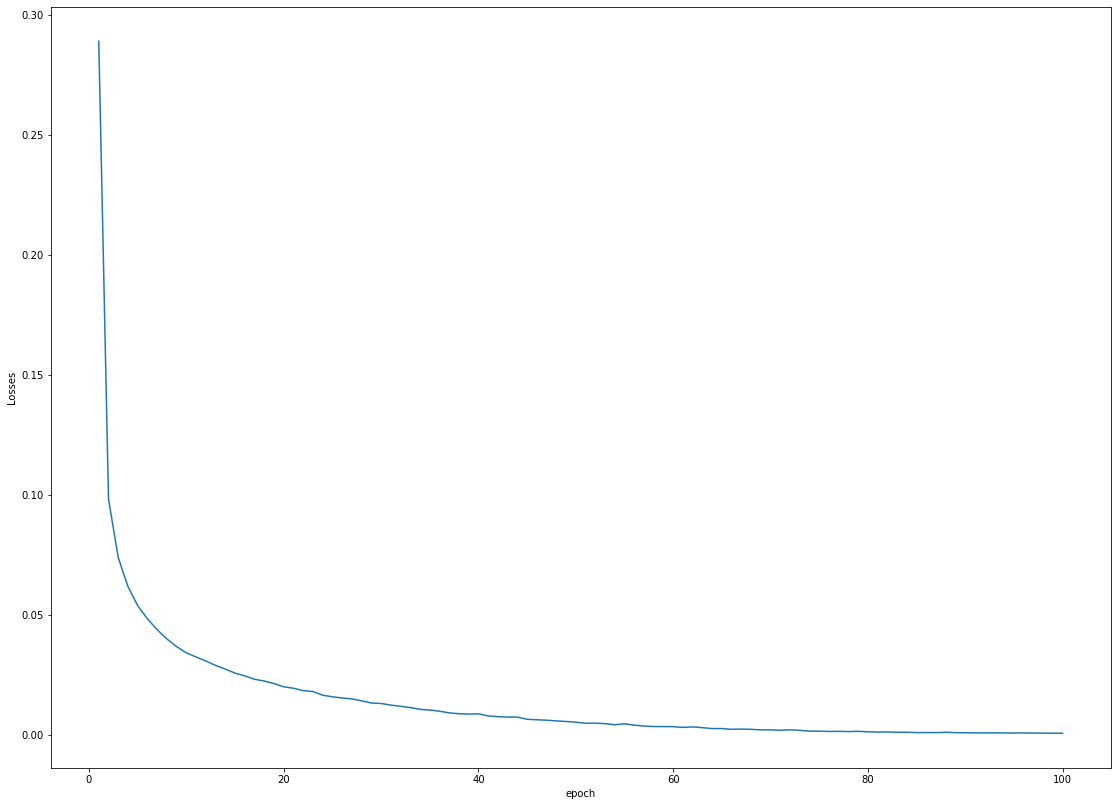

In [9]:
plt.figure(figsize=(19, 14))
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel("epoch")
plt.ylabel("Losses")
plt.show()

In [ ]:
correct = 0  
total = 0  
with torch.no_grad():   
    for data in test_loader:  
        inputs, target = data  
        inputs, target = inputs.to(device), target.to(device)
        outputs = model(inputs)  
        _, predicted = torch.max(outputs.data, 1)  
        total += target.size(0)  
        correct += (predicted == target).sum().item()  
print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 98.99%
